In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data preparation
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                3893 non-null   object 
 1   Length             3893 non-null   float64
 2   Diameter           3893 non-null   float64
 3   Height             3893 non-null   float64
 4   Shell Mass         3893 non-null   float64
 5   Visceral Fat Mass  3893 non-null   float64
 6   Body Fat Mass      3893 non-null   float64
 7   Age                3893 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 243.4+ KB
None


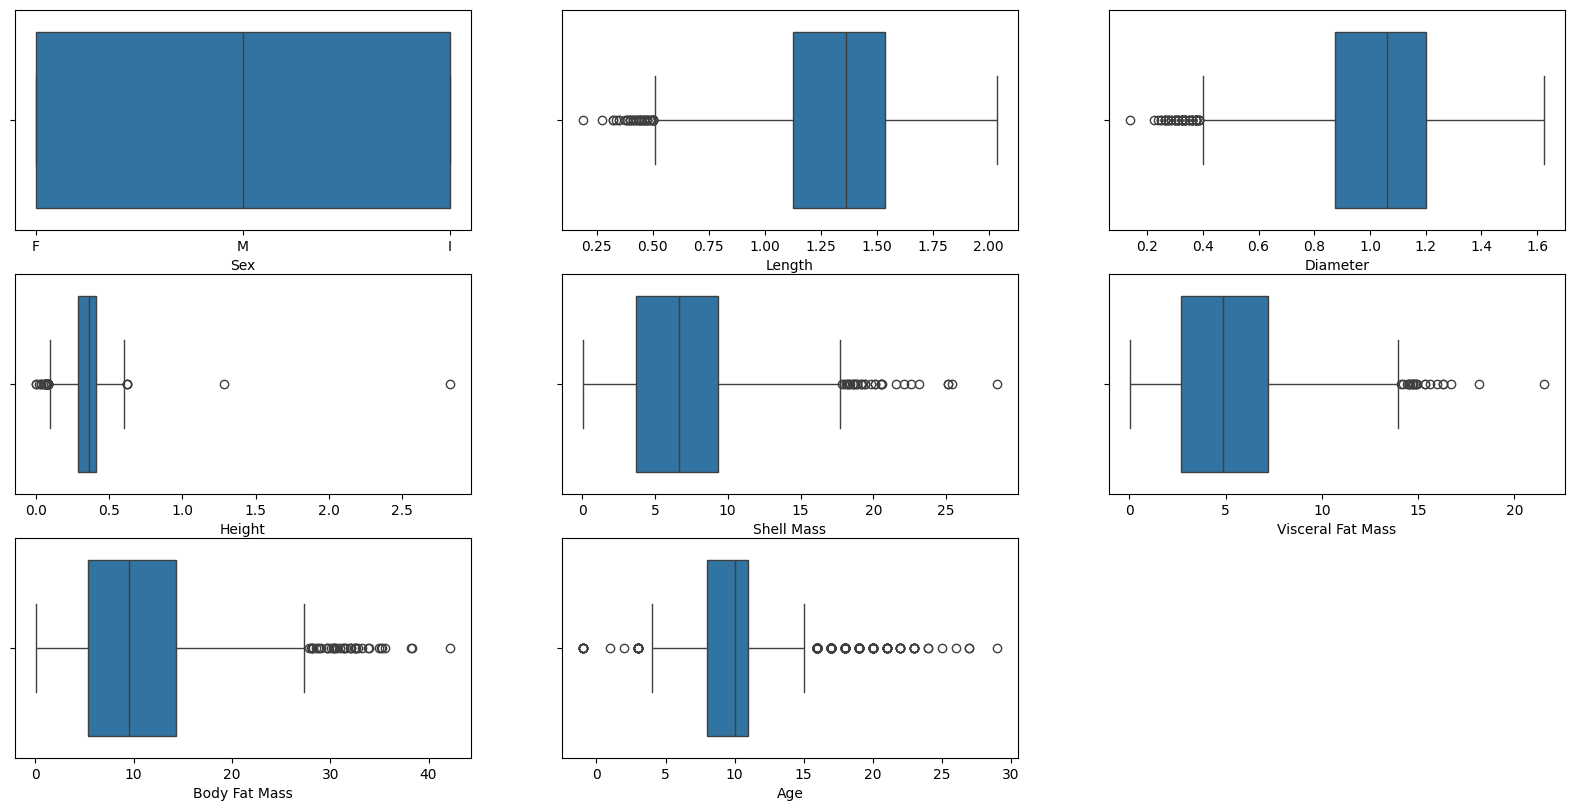

,Sex,Length,Diameter,Height,Shell Mass,Visceral Fat Mass,Body Fat Mass,Age
0,F,1.4375,1.1750,0.4125,6.747181,5.584852,12.332033,9
1,M,0.8875,0.6500,0.2125,1.559222,1.374951,2.296310,6
2,I,1.0375,0.7750,0.2500,2.764076,1.601747,3.231843,6
3,F,1.1750,0.8875,0.2500,5.244657,2.282135,4.748541,10
4,I,0.8875,0.6625,0.2125,1.700970,1.488349,3.458639,6


In [2]:
df = pd.read_csv(  		  	   		  		 			  		 			     			  	 
        "Alien Data Set.csv",  )  	
print(df.info())

df = df[df["Diameter"]<100]
# print(df.head())
# print(df["Age"].nunique())

fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)):
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[:,col])
plt.show()

df.head()

<Axes: >

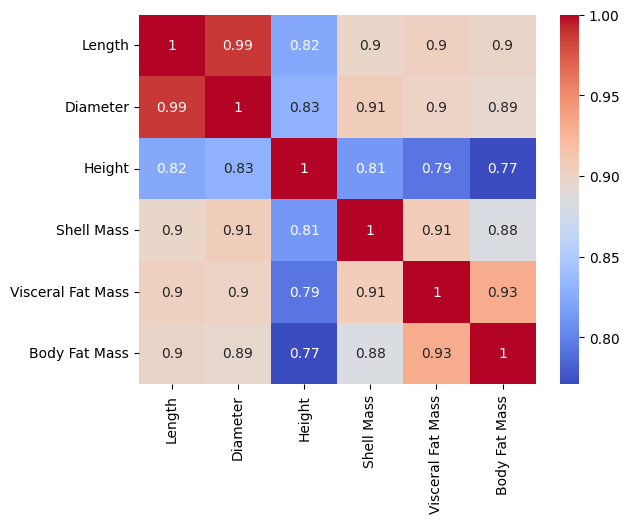

In [3]:
# fig = plt.figure(figsize=(20,20))
# for col in range(2):
#     fig.add_subplot(6,3,col+1)
#     sns.displot(df.iloc[:,col])
# plt.show()

sns.heatmap(df.iloc[:,1:-1].corr(),annot=True, cmap='coolwarm')

Check why there are values of age less than 0. It seems not a data mistake, as the other data entries look normal. Maybe alien age starts from -1.

Text(0.5, 1.0, 'alen age distribution')

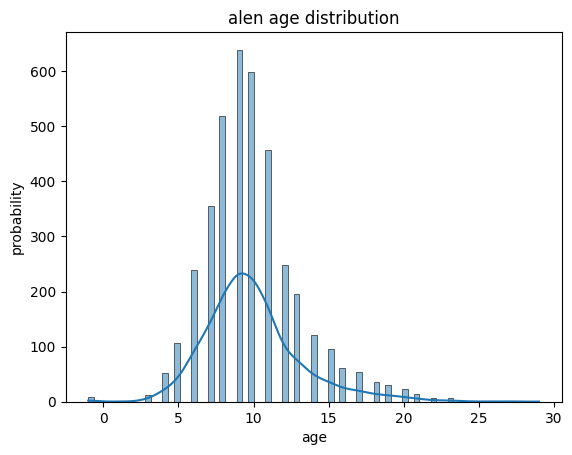

In [15]:
df['Age'].value_counts(normalize=True)
df_negative_age = df[df['Age']<0]
df_negative_age

# trying to add another total mass column
# df["total mass"]= df["Shell Mass"]+df["Visceral Fat Mass"]+df["Body Fat Mass"]


# see how it affects the performance by dropping some columns
# df = df.drop(columns=["Body Fat Mass"])

# plt.hist(df['Diameter'], bins=30, color='blue', edgecolor='black',density=True)
sns.histplot(df['Age'], kde=True)
plt.xlabel('age')
plt.ylabel('probability')
plt.title('alen age distribution')



##### data transformation

In [5]:
X=df.drop(columns=['Age'],axis=1)
y = df['Age'].astype(float)

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

num_pipeline= Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder",OneHotEncoder()),
    ("scaler",StandardScaler(with_mean=False))
    ]
)
preprocessor=ColumnTransformer(
    [
    ("num_pipeline",num_pipeline,num_features),
    ("cat_pipelines",cat_pipeline,cat_features)
    ]
)

X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##### select 5 regression models and compare their performances, only the best will be used

In [6]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(), 
    "Support Vector": SVR(),
}


def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    score = r2_score(true, predicted)
    return (mae, score)

model_list = []
mae_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy, r2_train  = evaluate_model(y_train, y_train_pred)

    model_test_accuracy, r2_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    # print("- accuracy: {:.4f}".format(model_train_accuracy))
    # print("- r2: {:.4f}".format(r2_train))
    # print('----------------------------------')
    
    print('Model performance for Testing set')
    print("- accuracy: {:.4f}".format(model_test_accuracy))
    print("- r2: {:.4f}".format(r2_test))

    model_list.append(model)
    mae_list.append(model_test_accuracy)
    
    print('='*35)



Linear Regression
Model performance for Training set
Model performance for Testing set
- accuracy: 1.6480
- r2: 0.4604
Decision Tree
Model performance for Training set
Model performance for Testing set
- accuracy: 2.1964
- r2: 0.0201
Random Forest
Model performance for Training set
Model performance for Testing set
- accuracy: 1.6459
- r2: 0.4710
Gradient Boosting
Model performance for Training set
Model performance for Testing set
- accuracy: 1.5802
- r2: 0.5017
Support Vector
Model performance for Training set
Model performance for Testing set
- accuracy: 1.5495
- r2: 0.4833


##### best model is linear regression

0.23491655969191272
0.47753530166880614
0.7355584082156611
0.8703465982028241


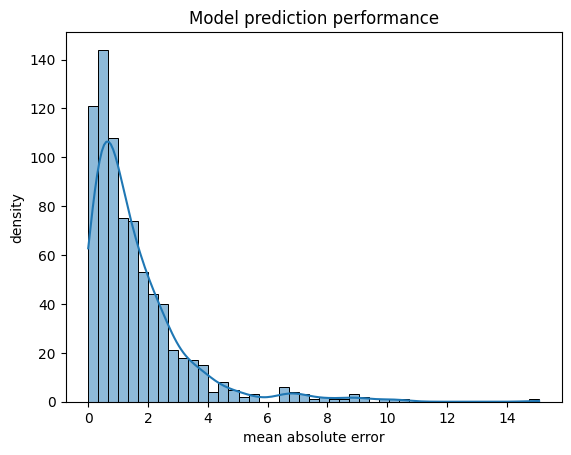

In [12]:
best_model= model_list[-2]
error = abs(best_model.predict(X_test)-y_test)

# plt.hist(error, bins=30, color='blue', edgecolor='black',density=True)

sns.histplot(error, kde=True)
plt.xlabel('mean absolute error')
plt.ylabel('density')
plt.title('Model prediction performance')
n=len(error)

print(len(error[error<0.5])/n)
print(len(error[error<1])/n)
print(len(error[error<2])/n)
print(len(error[error<3])/n)

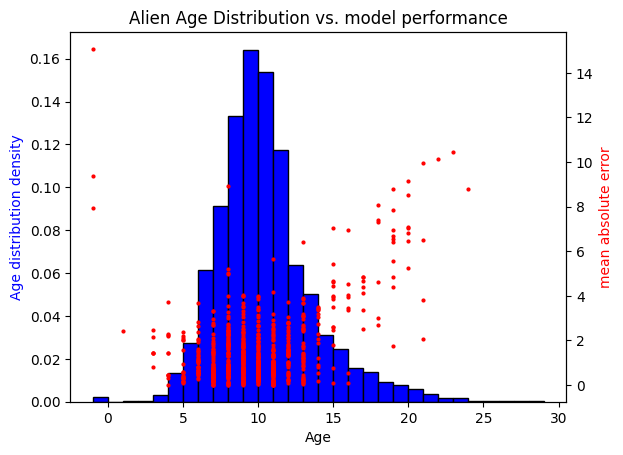

In [14]:
fig, ax1 = plt.subplots()

# Plot the histogram on the primary axis
ax1.hist(df['Age'], bins=30, color='blue', edgecolor='black', density=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('Age distribution density', color='blue')
ax1.set_title('Alien Age Distribution vs. model performance')

# Create secondary axis
ax2 = ax1.twinx()

# Plot the scatter plot on the secondary axis
ax2.scatter(y_test, error, color='red', label='Accuracy',s=4)
ax2.set_ylabel('mean absolute error', color='red')

# Show the plot
plt.show()
